In [181]:
import os

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix


In [184]:
data = pd.read_csv('winequality-red.csv')

In [185]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [187]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [188]:
 data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [189]:
correlation = data.corr()['quality'].drop('quality')

In [190]:
correlation

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

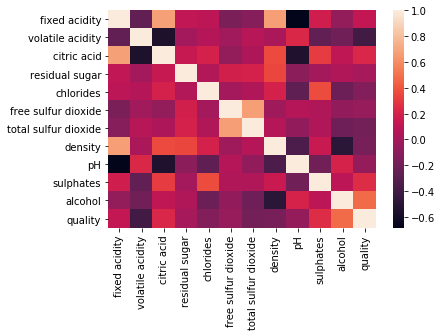

In [191]:
sns.heatmap(data.corr())

In [192]:
def get_features(correlation_threshold):
    abs_corrs = correlation.abs()
    high_correlation = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlation

In [193]:
features = get_features(0.05)
print(features)
x = data[features]
y = data['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [194]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [195]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [196]:
data['quality'] = data['quality'].map({3 : 'not good', 4 :'not good', 5: 'not good',
                                      6: 'good', 7: 'good', 8: 'good'})

In [197]:
data['quality'].value_counts()

good        855
not good    744
Name: quality, dtype: int64

In [210]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['quality'] = label.fit_transform(data['quality'])
data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int32>

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=2/3,random_state=0)

In [212]:
y_test.shape

(533,)

In [213]:
from sklearn.linear_model import LinearRegression
Createmodel = LinearRegression()

In [214]:
#fitting the model 
Createmodel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
Createmodel.coef_

array([-1.80680186e-02, -1.13874013e+00,  3.26506099e-02, -2.22185198e+00,
        2.79379897e-03, -3.15202449e-03,  7.98417151e+00, -5.64310046e-01,
        9.06199768e-01,  2.91836729e-01])

In [216]:
xpredict = Createmodel.predict(x_train)
xpredict

array([6.6545329 , 5.34982044, 5.73758058, ..., 5.29181154, 6.35750232,
       4.44580171])

In [217]:
y_predict =   Createmodel.predict(x_test)
y_predict

array([5.7632232 , 5.00757618, 6.57951203, 5.39554187, 5.87568221,
       5.07786858, 5.41180069, 6.00954586, 4.80480639, 4.99334196,
       5.34559151, 5.4861405 , 5.74120745, 5.11842156, 5.56681792,
       6.41291734, 6.80420284, 5.82678601, 5.9405415 , 5.03757998,
       6.30097989, 5.19342217, 5.61177086, 5.9888082 , 5.55224459,
       5.0093377 , 5.17750911, 6.54653792, 5.328143  , 6.19757393,
       6.08458439, 5.90954043, 5.53769396, 5.31929384, 5.75932175,
       6.26752823, 5.23281333, 5.45505939, 6.3612111 , 5.77466213,
       5.47497927, 6.01163913, 6.67127609, 6.56156662, 6.02989771,
       4.79304013, 5.52575355, 6.03560318, 5.52456194, 6.12038351,
       5.37915708, 5.39603689, 5.72538602, 6.35750232, 5.72722138,
       5.19023273, 5.08287311, 5.30329158, 6.49779364, 5.45527511,
       5.16566673, 5.76351893, 6.07728368, 6.32299349, 5.06552086,
       6.11452506, 5.38317494, 5.98610563, 6.08632927, 6.07357625,
       5.31882503, 5.50093698, 5.05001374, 5.5821154 , 5.66984

In [218]:
accuracy = Createmodel.score(x,y)
accuracy

0.356827145484778

In [209]:
error = 1-accuracy
error

0.643172854515222